# 03. Computer vision & convolutional neural networks in TensorFlow Exercises
https://github.com/mrdbourke/tensorflow-deep-learning

## 1.Spend 20-minutes reading and interacting with the CNN explainer website.

* What are the key terms? e.g. explain convolution in your own words, pooling in your own words


A **convolution** is the extraction of features in an image by using a kernel of size n x n, where n is a parameter. this kernel is an n x n matrix and it slides through the image, multiplying each value of the matrix by the pixel of the image it's on, and the result is the sum of the n x n multiplications at that step.

**Pooling** Consists of reducing the number of pixels of the image. MaxPooling does this by choosing only the pixel with maximum value in a n x n sliding window that goes through the image, like in convolution.

## 2.Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.

* What is the kernel size?
* What is the stride?
* How could you adjust each of these in TensorFlow code?

* Kernel size is the size of the sliding window that slides through the image to apply the filter

* The stride is the number of pixels the kernel advances after each step. A stride of 2 will mean that at each step, the kernel moves two pixels to the right and 2 pixels down after reaching the en d of the line

* These parameters can be adjusted in the tf.keras.layers.Conv2D object as input parameters

## 3.Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from zipfile import ZipFile

with ZipFile('03-CNN-exercice.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [12]:
# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("03-CNN-exercice"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '03-CNN-exercice'.
There are 2 directories and 0 images in '03-CNN-exercice/test'.
There are 0 directories and 2 images in '03-CNN-exercice/test/sanji'.
There are 0 directories and 2 images in '03-CNN-exercice/test/charizard'.
There are 2 directories and 0 images in '03-CNN-exercice/train'.
There are 0 directories and 8 images in '03-CNN-exercice/train/sanji'.
There are 0 directories and 8 images in '03-CNN-exercice/train/charizard'.


In [14]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("03-CNN-exercice/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from this subdirectory
print(class_names)

['charizard' 'sanji']


Images appear rotated 90 degrees (x and y axis ar interchanged) from the original in the phone because phones use other ways to rotate it

Image shapes in python mean (height, width), while shapes in windows are (width, height)

https://stackoverflow.com/questions/53079100/height-or-width-first-in-python

In [11]:
def rotate_and_flip_image(image):
  image = np.flip(image, axis=0)
  return np.transpose(image, (1, 0, 2))

In [4]:
import matplotlib.image as mpimg
import random
def show_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)[0]
  print(random_image)
  img = mpimg.imread(target_folder + '/' + random_image)
  img = rotate_and_flip_image(img)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("on")

  print(f"Image shape: {img.shape}")

  return img


IMG_20220307_124613.jpg
Image shape: (4000, 3000, 3)


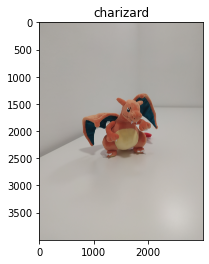

In [8]:
img = show_random_image(target_dir="03-CNN-exercice/train/",
                        target_class="charizard")

IMG_20220307_140025.jpg
Image shape: (4000, 3000, 3)


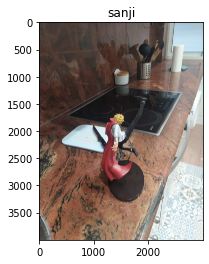

In [7]:
img = show_random_image(target_dir="03-CNN-exercice/train/",
                        target_class="sanji")

## Preprocess the data

In [15]:
# Define directory paths
train_dir = "03-CNN-exercice/train/"
test_dir = "03-CNN-exercice/test/"

In [35]:
# Create train and test data generators and preprocess the images
# use our function rotate_and_flip_images as the preprocessing_function
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255., preprocessing_function=rotate_and_flip_image)
test_datagen = ImageDataGenerator(rescale=1./255., preprocessing_function=rotate_and_flip_image)

In [124]:
# get train_data and test_data using flowfromdirectory
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(512, 512),
                                               class_mode="binary",
                                               batch_size=4)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(512, 512),
                                               class_mode="binary",
                                               batch_size=4)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [37]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(4, 4)

In [38]:
16/4 #16 train images / 4 batch size

4.0

In [39]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.22352943, 0.24705884, 0.30980393],
          [0.23137257, 0.23529413, 0.30588236],
          [0.21176472, 0.22352943, 0.2901961 ],
          ...,
          [0.18431373, 0.19607845, 0.25490198],
          [0.1764706 , 0.20000002, 0.25490198],
          [0.17254902, 0.18431373, 0.2509804 ]],
 
         [[0.227451  , 0.2392157 , 0.3137255 ],
          [0.23137257, 0.23529413, 0.3137255 ],
          [0.227451  , 0.2392157 , 0.30588236],
          ...,
          [0.1764706 , 0.18431373, 0.24313727],
          [0.14901961, 0.16470589, 0.21176472],
          [0.16470589, 0.1764706 , 0.24313727]],
 
         [[0.22352943, 0.23529413, 0.3019608 ],
          [0.22352943, 0.23529413, 0.3019608 ],
          [0.22352943, 0.23529413, 0.29411766],
          ...,
          [0.20000002, 0.20392159, 0.27450982],
          [0.16078432, 0.17254902, 0.23137257],
          [0.21176472, 0.23529413, 0.28235295]],
 
         ...,
 
         [[0.40000004, 0.6392157 , 0.5686275 ],
          [0.52549

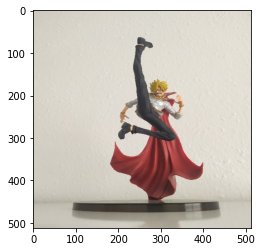

In [51]:
# Show train image
plt.imshow(images[3])

## Create the model

In [76]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

tf.random.set_seed(42)

model_1 = Sequential([
  Conv2D(10, 3, input_shape=(512, 512, 3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [77]:
# Get a summary of our model
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 510, 510, 10)      280       
                                                                 
 conv2d_43 (Conv2D)          (None, 508, 508, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 254, 254, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 conv2d_45 (Conv2D)          (None, 250, 250, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 125, 125, 10)     0         
 g2D)                                                 

In [78]:
tf.random.set_seed(42)
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
4/4 [==============================] - 7s 2s/step - loss: 1.2772 - accuracy: 0.6250 - val_loss: 0.8314 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.8696 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.7500
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.7083 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.7319 - accuracy: 0.5625 - val_loss: 0.8266 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.6573 - accuracy: 0.5625 - val_loss: 0.7353 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.5495 - accuracy: 0.6875 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.4948 - accuracy: 0.8125 - val_loss: 0.7555 - val_accuracy: 0.5000
Epoch 8/10
4/4 [=========================

## Evaluate the model

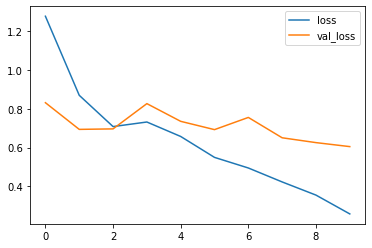

In [87]:
# Plot trainign curves
pd.DataFrame(history_1.history)[["loss", "val_loss"]].plot()

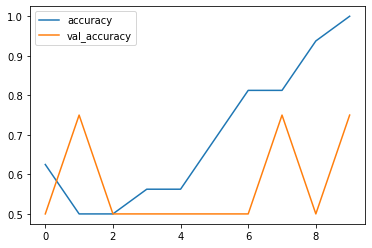

In [88]:
pd.DataFrame(history_1.history)[["accuracy", "val_accuracy"]].plot()

## Improve the model

In [102]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

tf.random.set_seed(42)

model_2 = Sequential([
  Conv2D(10, 3, input_shape=(512, 512, 3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [103]:
tf.random.set_seed(42)
history_2 = model_2.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/20
4/4 [==============================] - 8s 2s/step - loss: 0.8334 - accuracy: 0.4375 - val_loss: 0.7014 - val_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.6735 - accuracy: 0.7500 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6592 - accuracy: 0.5625 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.5928 - accuracy: 0.7500 - val_loss: 0.6776 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.5091 - accuracy: 0.8125 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.4404 - accuracy: 0.8125 - val_loss: 0.6705 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.2955 - accuracy: 0.9375 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 8/20
4/4 [=========================

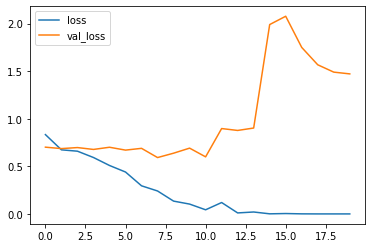

In [104]:
# Plot trainign curves
pd.DataFrame(history_2.history)[["loss", "val_loss"]].plot()

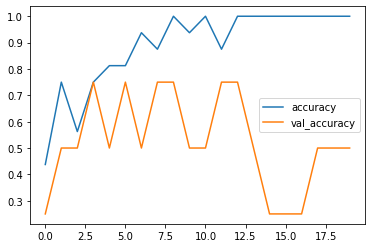

In [106]:
pd.DataFrame(history_2.history)[["accuracy", "val_accuracy"]].plot()

Model_2 is overfitted

In [115]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

tf.random.set_seed(42)

model_3 = Sequential([
  Conv2D(100, 3, input_shape=(512, 512, 3), activation="relu"),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(100, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [116]:
tf.random.set_seed(42)
history_3 = model_3.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/20
4/4 [==============================] - 8s 2s/step - loss: 34.5954 - accuracy: 0.6250 - val_loss: 1.4260 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 1.5629 - accuracy: 0.3750 - val_loss: 2.0215 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 1.3148 - accuracy: 0.5000 - val_loss: 0.7173 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.7479 - accuracy: 0.5000 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.6291 - accuracy: 0.6250 - val_loss: 0.6630 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 1.0108 - accuracy: 0.6875 - val_loss: 0.6506 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.3942 - accuracy: 0.8125 - val_loss: 3.1551 - val_accuracy: 0.5000
Epoch 8/20
4/4 [========================

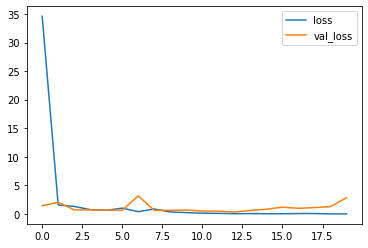

In [117]:
# Plot trainign curves
pd.DataFrame(history_3.history)[["loss", "val_loss"]].plot()

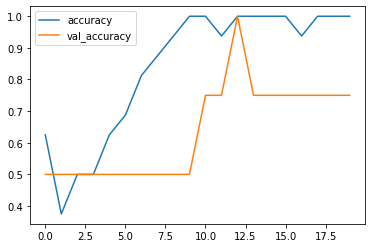

In [119]:
pd.DataFrame(history_3.history)[["accuracy", "val_accuracy"]].plot()

Let's try using the full image and not resize it to (512 x 512)

In [148]:
train_data_big = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(3000, 3000),
                                               class_mode="binary",
                                               batch_size=4)

test_data_big = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(3000, 3000),
                                               class_mode="binary",
                                               batch_size=4)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [149]:
# Get a sample of a train data batch
images, labels = train_data_big.next()
len(images), len(labels)

(4, 4)

In [158]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

tf.random.set_seed(42)

model_4 = Sequential([
  Conv2D(10, 3, input_shape=(3000, 3000, 3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [159]:
model_4.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 2998, 2998, 10)    280       
                                                                 
 conv2d_115 (Conv2D)         (None, 2996, 2996, 10)    910       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 1498, 1498, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_116 (Conv2D)         (None, 1496, 1496, 10)    910       
                                                                 
 conv2d_117 (Conv2D)         (None, 1494, 1494, 10)    910       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 747, 747, 10)     0         
 g2D)                                                

In [160]:
tf.random.set_seed(42)
history_4 = model_4.fit(train_data_big,
            epochs=10,
            steps_per_epoch=len(train_data_big),
            validation_data=test_data_big,
            validation_steps=len(test_data_big))

Epoch 1/10
4/4 [==============================] - 23s 6s/step - loss: 42.6539 - accuracy: 0.5000 - val_loss: 29.6401 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 18s 4s/step - loss: 14.9767 - accuracy: 0.3125 - val_loss: 5.5332 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 19s 4s/step - loss: 2.8964 - accuracy: 0.6875 - val_loss: 6.4637 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 20s 5s/step - loss: 1.3484 - accuracy: 0.7500 - val_loss: 1.7550 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 18s 5s/step - loss: 0.0660 - accuracy: 1.0000 - val_loss: 2.2587 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 18s 5s/step - loss: 0.0957 - accuracy: 0.9375 - val_loss: 1.3993 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 18s 5s/step - loss: 0.1951 - accuracy: 0.8750 - val_loss: 1.3951 - val_accuracy: 0.7500
Epoch 8/10
4/4 [===============

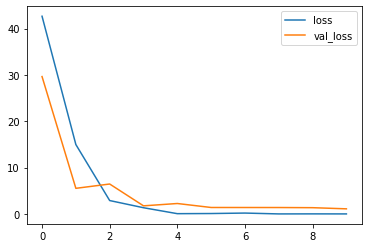

In [161]:
# Plot trainign curves
pd.DataFrame(history_4.history)[["loss", "val_loss"]].plot()

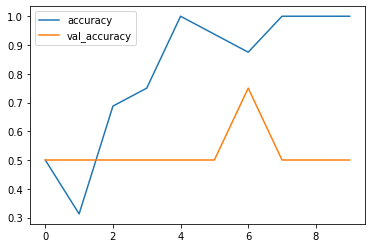

In [163]:
pd.DataFrame(history_4.history)[["accuracy", "val_accuracy"]].plot()

## Let's view predictions on model_3

In [166]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=512):
  """
  Reads an image from a filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename) # returns encoded image (bytes)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img) # returns decoded image (matrix)
  # Resize the image
  img = rotate_and_flip_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [169]:
image = load_and_prep_image("/content/03-CNN-exercice/test/sanji/IMG_20220307_124625.jpg")

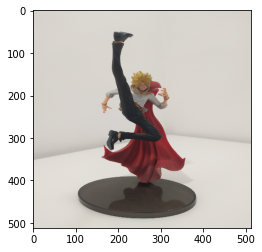

In [171]:
plt.imshow(image)

In [173]:
pred = model_3.predict(tf.expand_dims(image, axis=0))
print(pred), class_names

[[0.9999939]]


(None, array(['charizard', 'sanji'], dtype='<U9'))

In [176]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'sanji'

In [186]:
# show test image and prediction
def show_image_prediction(img_path):
  image = load_and_prep_image(img_path)
  pred = model_3.predict(tf.expand_dims(image, axis=0))
  pred_class=class_names[int(tf.round(pred))]
  plt.imshow(image)
  plt.title(f"This image is: {pred_class}")

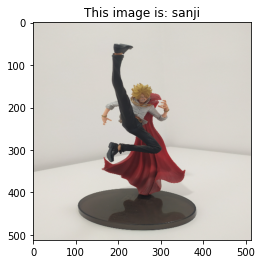

In [187]:
show_image_prediction("/content/03-CNN-exercice/test/sanji/IMG_20220307_124625.jpg")

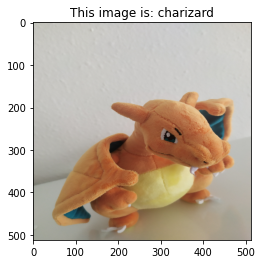

In [188]:
show_image_prediction("/content/03-CNN-exercice/test/charizard/IMG_20220307_135803.jpg")

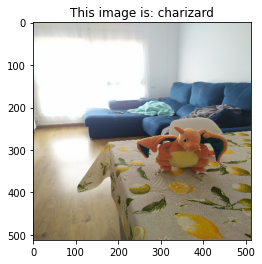

In [189]:
show_image_prediction("/content/03-CNN-exercice/test/charizard/IMG_20220307_124652.jpg")

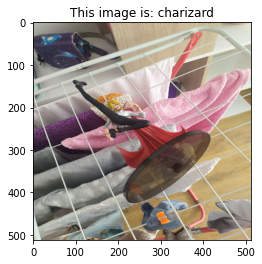

In [190]:
show_image_prediction("/content/03-CNN-exercice/test/sanji/IMG_20220307_135856.jpg")

The last prediction is wrong, probably vecause there's a training image of charizard on the same clothesline, and considers the clothline as a feature of charizard

## 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

The ideal learning rate was 0.001